<img src="./logo_UTN.svg" align="right" width="150" /> 



# Trabajo de Laboratorio Nº 2

## Teoría de los Circuitos 2

#### Juan Camilo Mariscal Gutierrez


## Consignas

#### Objetivos:

Consolidar los conceptos de los sistemas muestreados mediante el uso de ADC y DACs.

Simular e implementar un filtro digital con el LPC1769 LPCXpresso. 

Familiarizarse con el uso de librerías para procesamiento digital de señales.

Medir las partes de la función transferencia H[z] para frecuencias menores a 10 kHz.

#### Descripción

El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro digital. 

<img src="./tipo de filtro.png"  /> 



## Conexión de los instrumentos y etapas

<img src="./coneccion.png"  /> 


## Desarrollo numerico y simbolico en Python

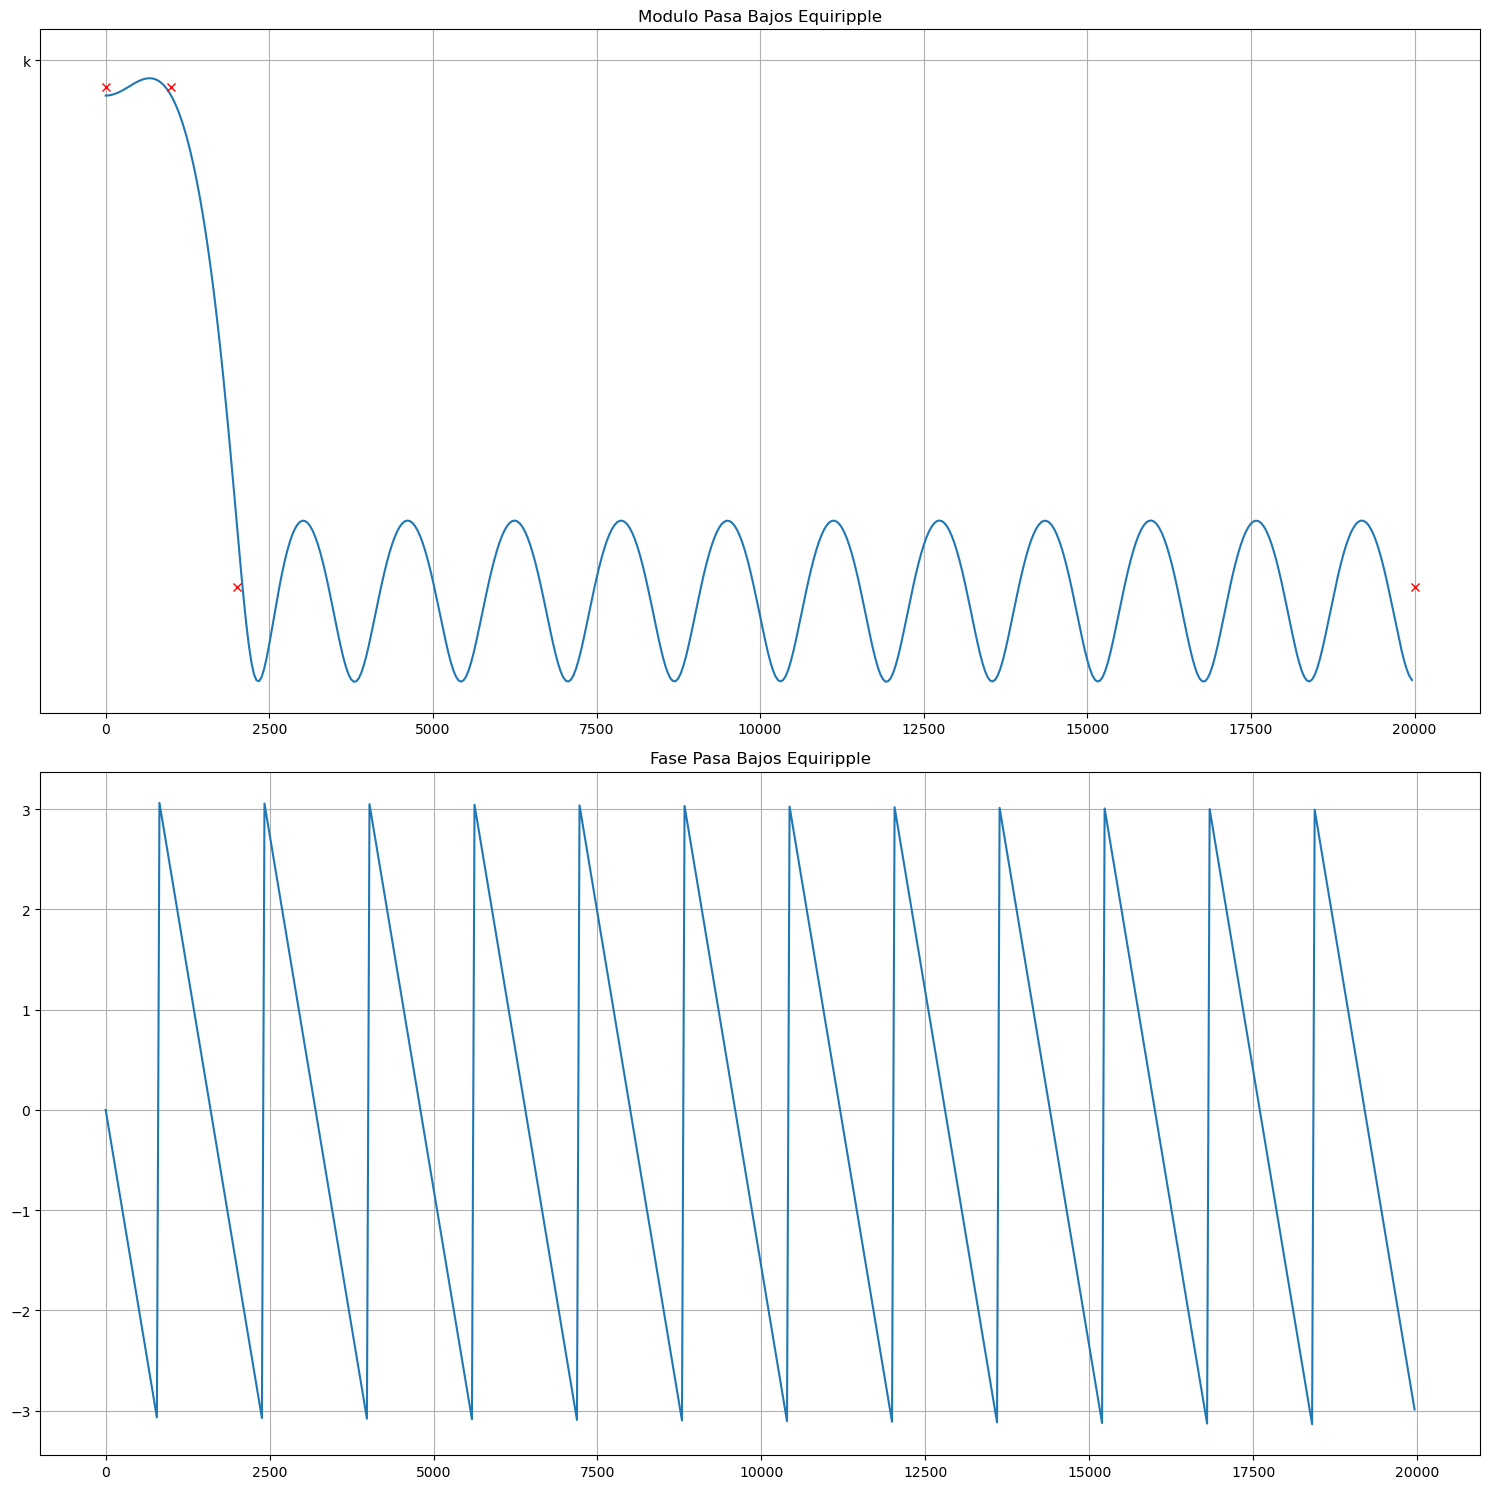

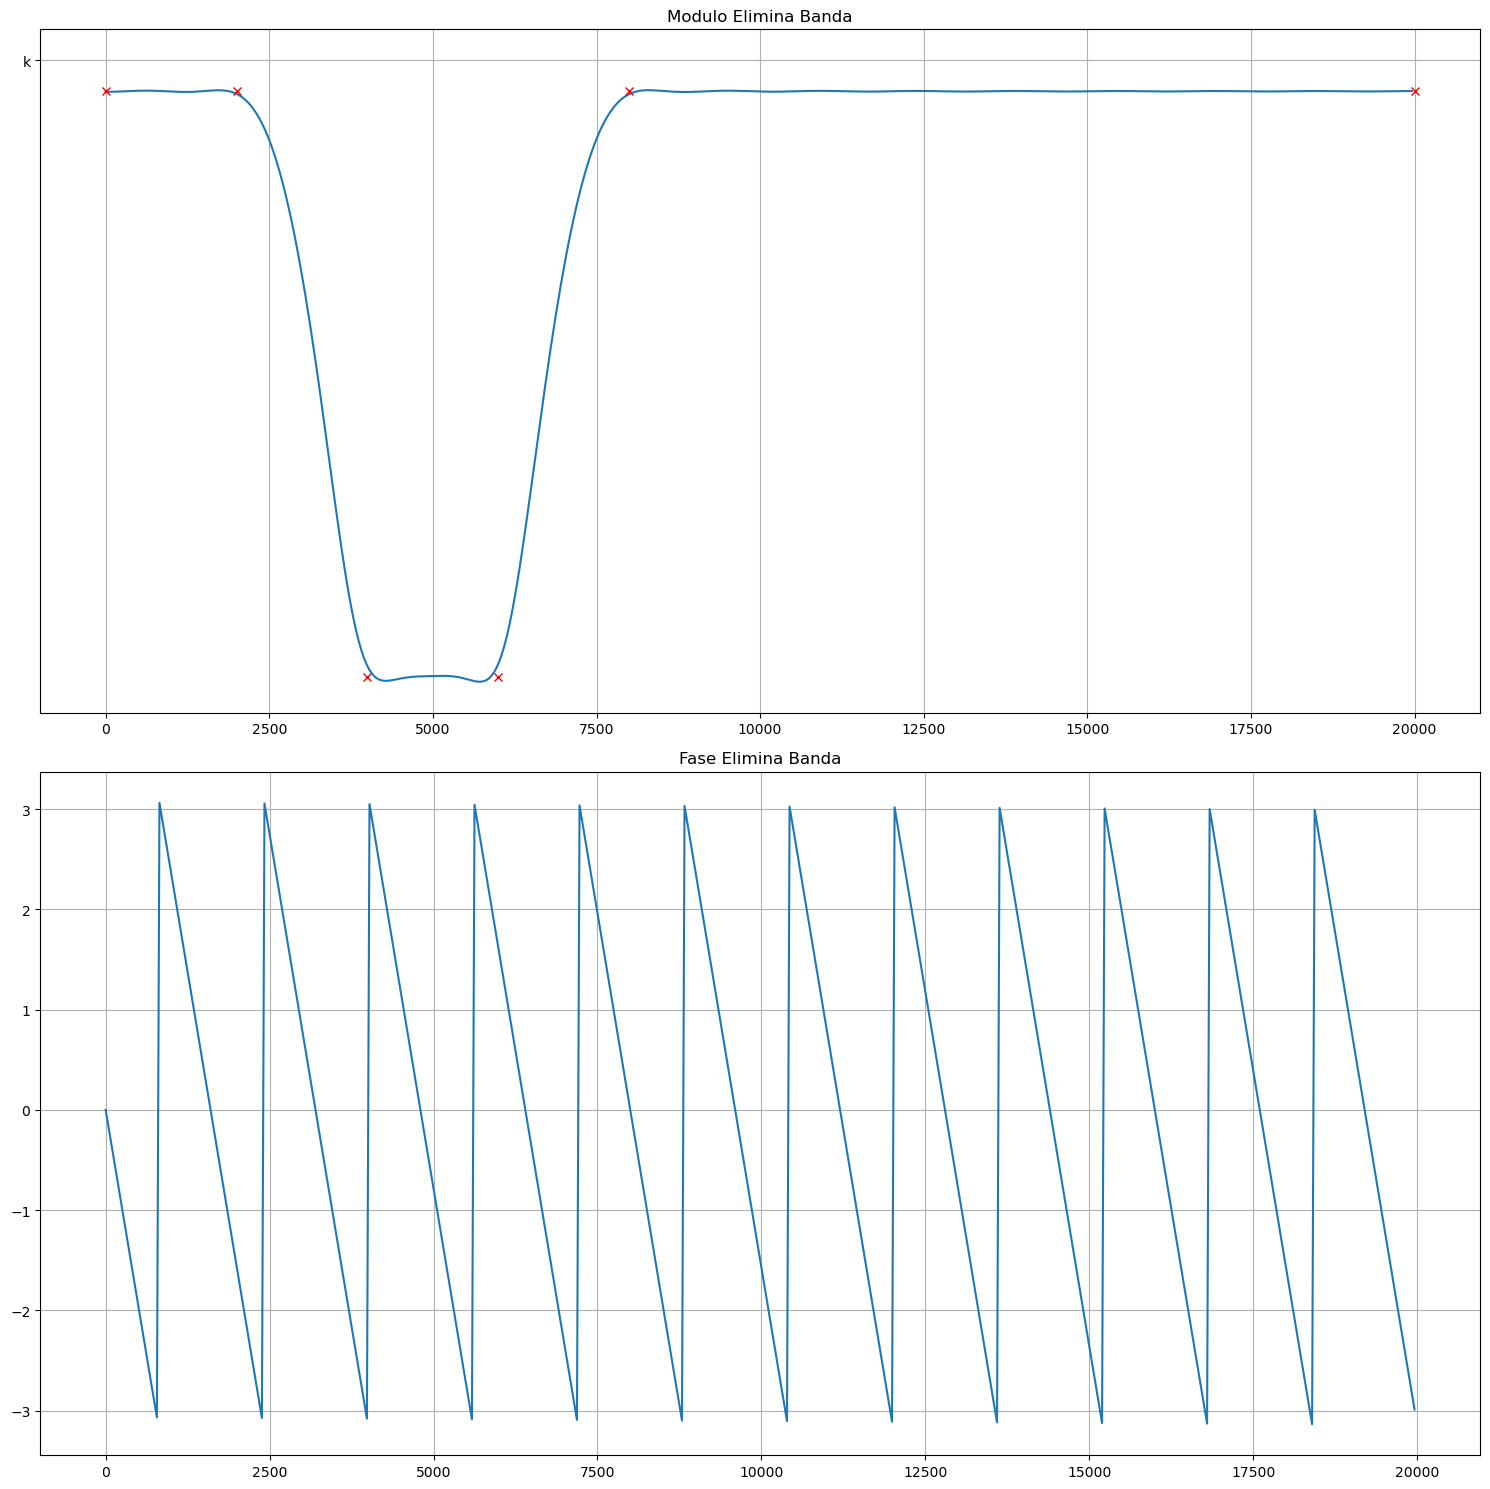

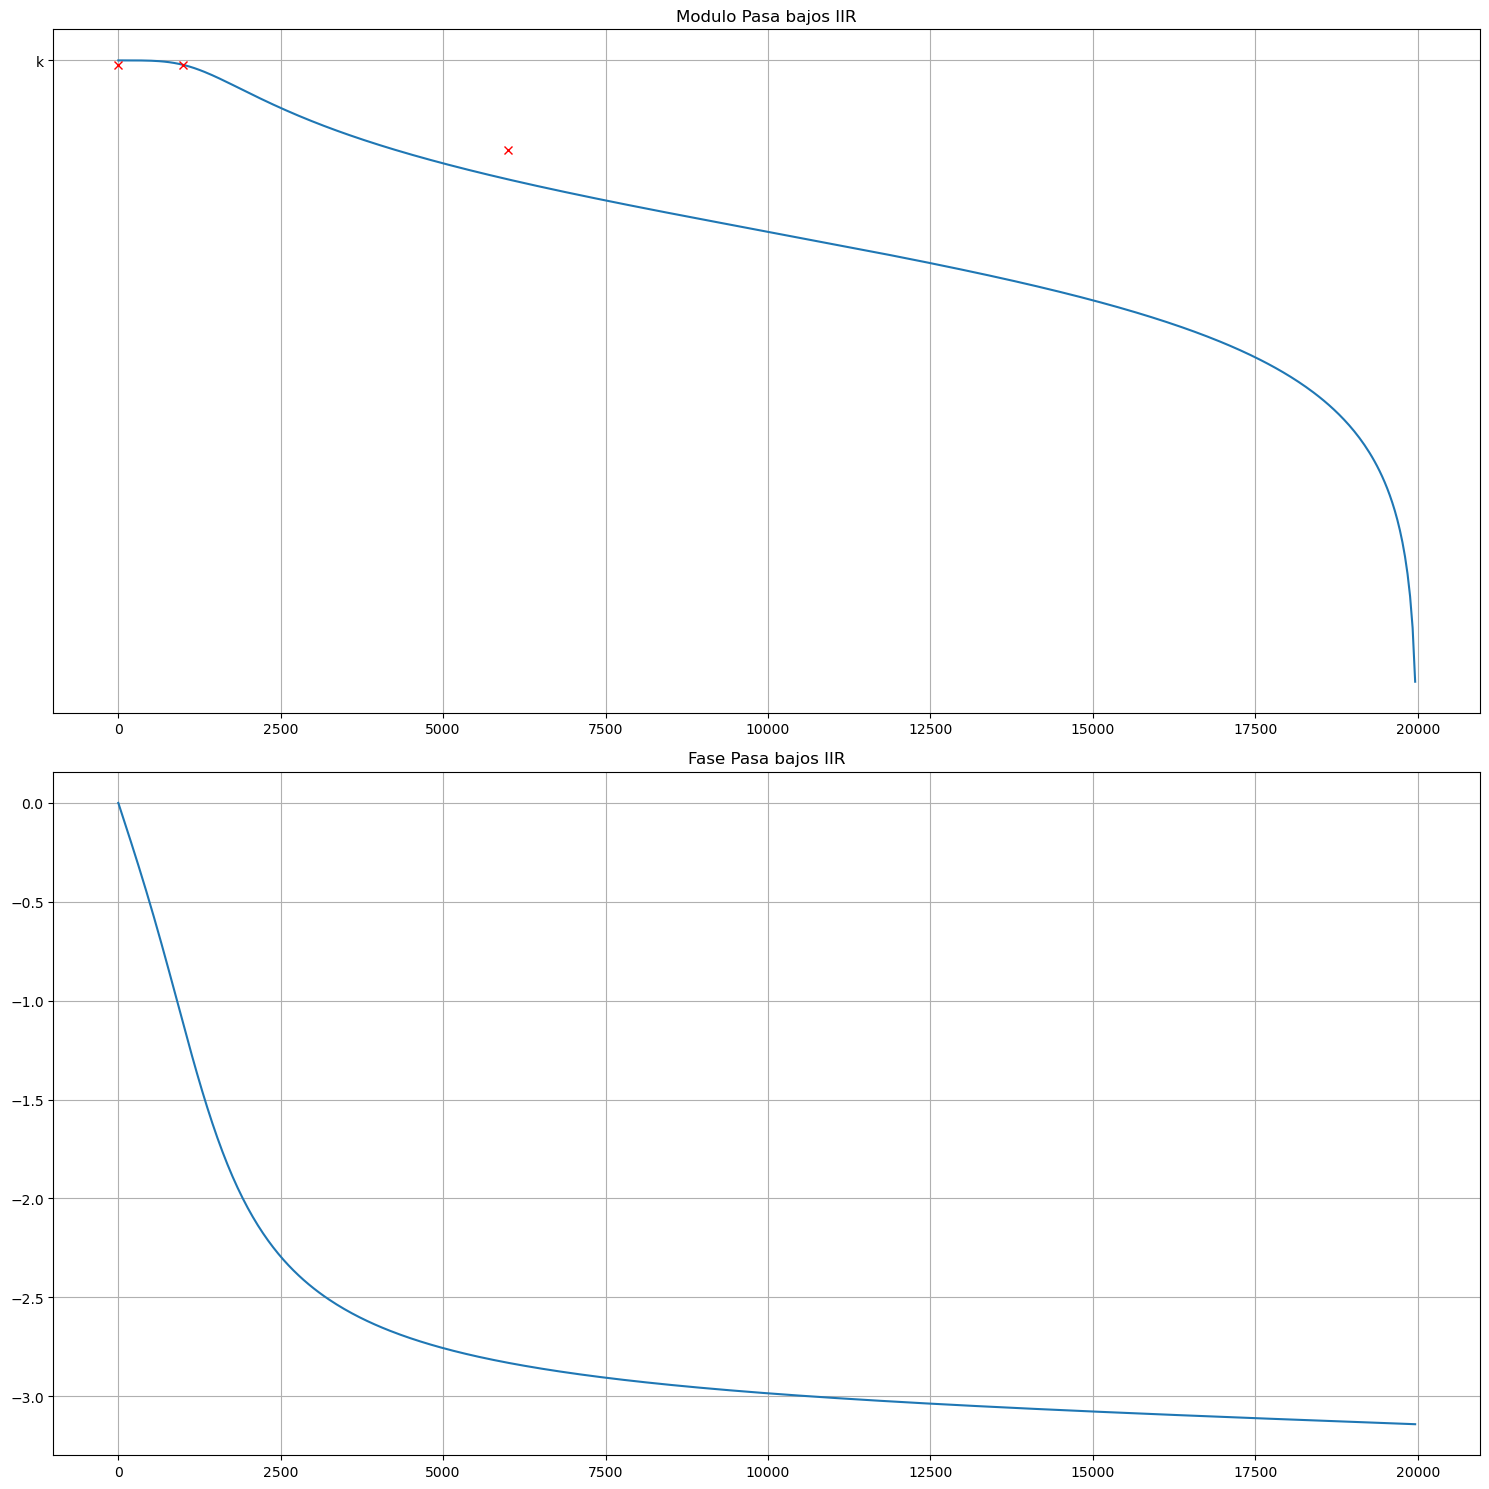

In [2]:
from numpy import genfromtxt
from IPython.display import display, Markdown
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')
# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from pytc2.sistemas_lineales import plot_plantilla

#Nyquist

fs = 40000 # Hz
frec_nyq = fs / 2

############## Plantilla
# filter design
alpha_min = 20
alpha_max = 1

#############    Pasa Bajos Equiripple
# LP equi ripple FIR
taps_a = 51
frecs_a = [0, 1000, 2000, frec_nyq]
gains_db_a = [-alpha_max, -alpha_min]
gains_db_a_2 = [-alpha_max, -alpha_max ,-alpha_min, -alpha_min]
gains_vs_a = 10**(np.array(gains_db_a)/20)
num_a = sig.remez(taps_a, frecs_a, gains_vs_a, fs=fs)
wz_a, hz_a = sig.freqz(num_a, 1.0)

################# Elimina Banda
# Stop Band
taps_b = 51
frecs_b = [0, 2000, 4000, 6000, 8000, frec_nyq]
gains_db_b = [-alpha_max, -alpha_max, -alpha_min, -alpha_min, -alpha_max, -alpha_max]
gains_vs_b = 10**(np.array(gains_db_b)/20)
num_b = sig.firls(taps_b, frecs_b, gains_vs_b, fs=fs)
wz_b, hz_b = sig.freqz(num_b, 1.0)

############################# Pasa bajos IIR
# LP IIR
frecs_c = [0, 1000, 6000, frec_nyq]
gains_db_c = [-1, -1, -20, -np.inf]
num_c, den_c = sig.iirdesign(
    wp=1000, 
    ws=6000, 
    gpass=alpha_max,
    gstop=alpha_min, 
    analog=False, 
    ftype='butter', 
    output='ba', 
    fs=fs
    )
wz_c, hz_c = sig.freqz(num_c, den_c)


### PLOT TF A
fig_a, ax_a = plt.subplots(2, 1, figsize=(15, 15))
ax_a[0].set_title("Modulo Pasa Bajos Equiripple")
ax_a[0].plot(wz_a*fs/(2*np.pi), 20*np.log10(hz_a))
ax_a[0].plot(frecs_a, gains_db_a_2, 'rx', 'k')
ax_a[0].grid()
ax_a[1].set_title("Fase Pasa Bajos Equiripple")
ax_a[1].plot(wz_a*fs/(2*np.pi), np.angle(hz_a))
ax_a[1].grid()
fig_a.tight_layout()

### PLOT TF B
fig_b, ax_b = plt.subplots(2, 1, figsize=(15, 15))
ax_b[0].set_title("Modulo Elimina Banda")
ax_b[0].plot(wz_b*fs/(2*np.pi), 20*np.log10(hz_b))
ax_b[0].plot(frecs_b, gains_db_b, 'rx', 'k')
ax_b[0].grid()
ax_b[1].set_title("Fase Elimina Banda")
ax_b[1].plot(wz_b*fs/(2*np.pi), np.angle(hz_b))
ax_b[1].grid()
fig_b.tight_layout()

### PLOT TF B
fig_c, ax_c = plt.subplots(2, 1, figsize=(15, 15))
ax_c[0].set_title("Modulo Pasa bajos IIR")
ax_c[0].plot(wz_c*fs/(2*np.pi), 20*np.log10(hz_c))
ax_c[0].plot(frecs_c, gains_db_c, 'rx', 'k')
ax_c[0].grid()
ax_c[1].set_title("Fase Pasa bajos IIR")
ax_c[1].plot(wz_c*fs/(2*np.pi), np.angle(hz_c))
ax_c[1].grid()
fig_c.tight_layout()

## calculo de la etapa del filtro pasa bajos 

Esta epsta se pusa para filtrar la senales por arriba de los 10khz para evitar que las frecuencias superiores se metan en la banda de frecuencia de trabajado al momento de digitalizar la senal.


\begin{equation}
\frac{V_O}{V_I}=\frac{\omega_O}{S + \omega_O} 
\end{equation}

##### filtro pasa bajos de orden 1
\begin{equation}
\frac{V_O}{V_I}=\frac{\frac{1}{RC}}{S + \frac{1}{RC}} 
\end{equation}


##### fo= 10KHz y adoptando una C= 22uF

\begin{equation}
R=\frac{1}{C2\pi fo}
\end{equation}

\begin{equation}
R= 723,34
\end{equation}



## Mediciones y graficos de los filtros diseñados


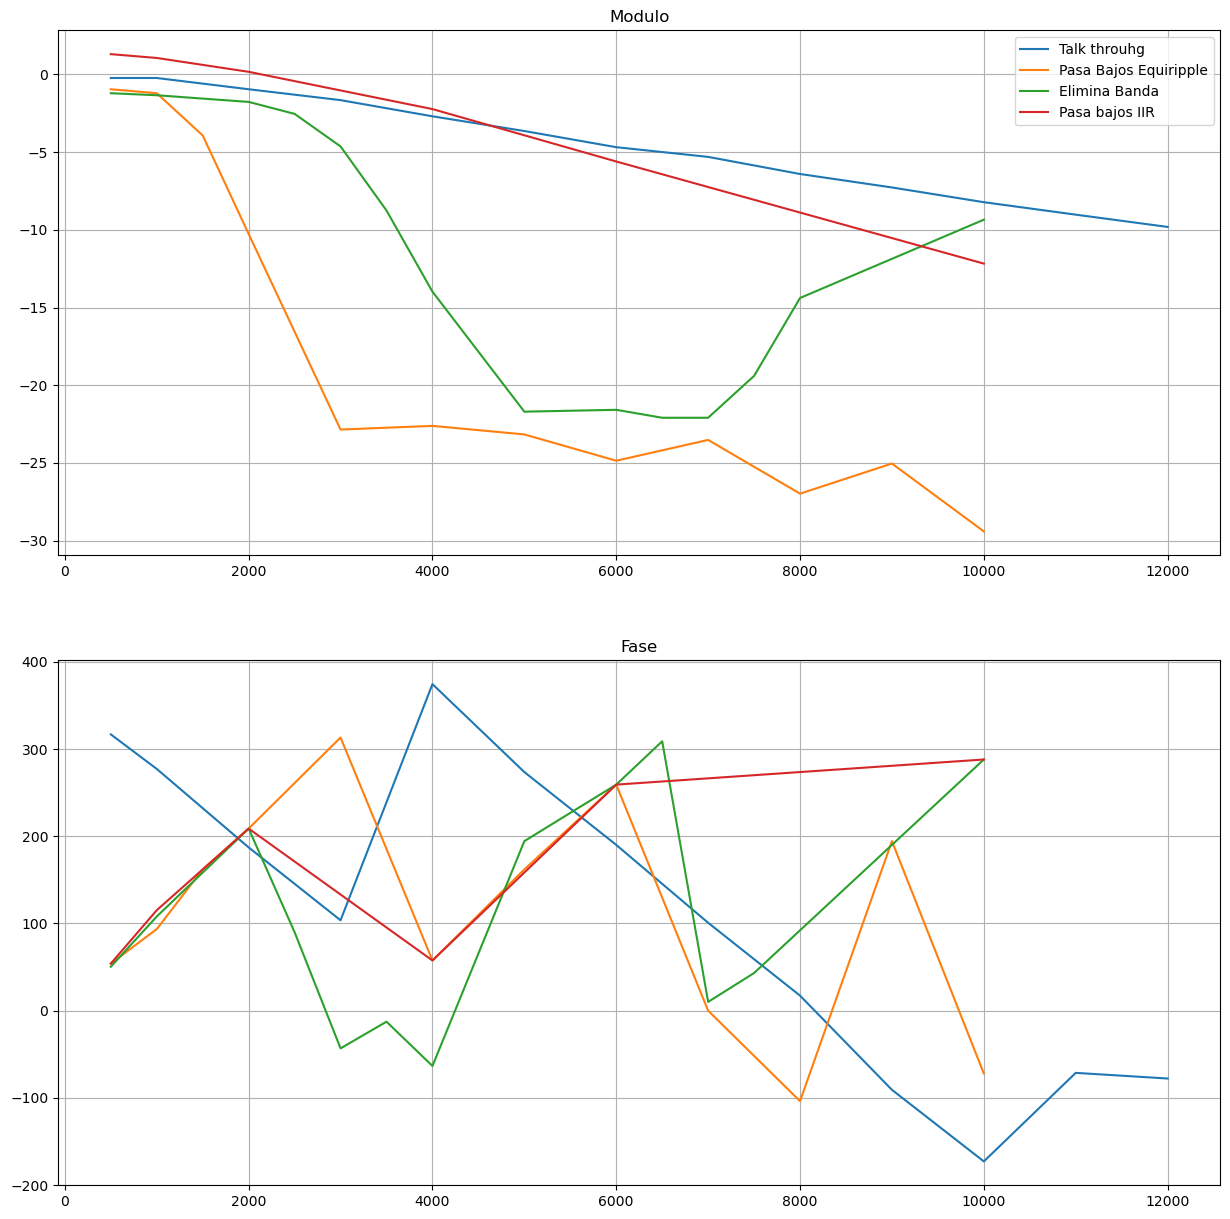

In [5]:
# Modulo y retrazo de senales en modo talk_Through
freqs_base_line = np.array([500,     1000,   2000,   3000,  4000,   5000,   6000,  7000,  8000, 9000,   10000,  11000, 12000])
times_base_line = np.array([1.76e-3, 770e-6, 260e-6, 96e-6, 260e-6, 152e-6, 88e-6, 40e-6, 6e-6, -28e-6, -48e-6, -18e-6, -18e-6])
vi_base_line = np.array([3.08, 3.08, 3.08, 3, 3, 2.92, 2.88, 2.8, 2.76, 2.68, 2.68, 2.6,  2.6])
vo_base_line = np.array([3, 3, 2.76, 2.48, 2.20, 1.92, 1.68, 1.52, 1.32, 1.16, 1.04, 0.92, 0.84])
phase_base_line = np.multiply(np.array(360*freqs_base_line), times_base_line)

# Modulo y retrazo para el filtro A
freqs_filter_a = np.array([500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
vi_filter_a = np.array(   [3.08, 3.08, 3.08, 3,    3,     2.92,  2.88, 2.8,  2.76,  2.68,  2.68, 2.6])
vo_filter_a = np.array(   [2.76, 2.68, 1.96, 0.92, 0.216, 0.216, 0.2,  0.16, 0.184, 0.12,  0.15, 0.088])
times_filter_a = np.array([300e-6, 260e-6, 300e-6, 290e-6, 290e-6, 40e-6, 90e-6, 120e-6, 0, -36e-6, 60e-6, -20e-6])
phase_filter_a = np.multiply(np.array(360*freqs_filter_a), times_filter_a)

# Modulo y retrazo para el filtro B
freqs_filter_b = np.array([500,    1000,   2000,   2500,   3000,   3500,   4000,   5000,   6000,   6500,  7000, 7500,   8000, 10000])
vi_filter_b = np.array(   [3.08,   3.08,   3.04,   3,      3,      2.96,   3,      2.92,   2.88,   2.8,    2.8,  2.8,   2.62,  2.64])
vo_filter_b = np.array(   [2.68,   2.64,    2.48,   2.24,   1.76,   1.08,   0.6,    0.24,   0.24,   0.22,  0.22, 0.3,   0.5,   0.9 ])
times_filter_b = np.array([280e-6, 300e-6, 290e-6, 100e-6, -40e-6, -10e-6, -44e-6, 108e-6, 120e-6, 132e-6, 4e-6, 16e-6, 32e-6, 80e-6])
phase_filter_b = np.multiply(np.array(360*freqs_filter_b), times_filter_b)

# Modulo y retrazo para el filtro C
freqs_filter_c = np.array([500,    1000,   2000,   4000,  6000,   10000])
vi_filter_c = np.array(   [3.08,   3.08,   3.04,   2.96,  2.84,   2.64])
vo_filter_c = np.array(   [3.58,   3.48,   3.1,    2.29,  1.49,   0.65])
times_filter_c = np.array([300e-6, 320e-6, 290e-6, 40e-6, 120e-6, 80e-6])
phase_filter_c = np.multiply(np.array(360*freqs_filter_c), times_filter_c)

amp_base_line = 20*np.log10(vo_base_line/vi_base_line)
amp_filter_a = 20*np.log10(vo_filter_a/vi_filter_a)
amp_filter_b = 20*np.log10(vo_filter_b/vi_filter_b)
amp_filter_c = 20*np.log10(vo_filter_c/vi_filter_c)

fig_man_1, ax_man_1 =  plt.subplots(2, 1, figsize = (15, 15))
ax_man_1[0].set_title('Modulo')
ax_man_1[0].plot(freqs_base_line, amp_base_line)
ax_man_1[0].plot(freqs_filter_a, amp_filter_a)
ax_man_1[0].plot(freqs_filter_b, amp_filter_b)
ax_man_1[0].plot(freqs_filter_c, amp_filter_c)
ax_man_1[0].legend(["Talk throuhg", "Pasa Bajos Equiripple", "Elimina Banda", "Pasa bajos IIR"])

ax_man_1[0].grid()
ax_man_1[1].set_title('Fase')
ax_man_1[1].plot(freqs_base_line, phase_base_line)
ax_man_1[1].plot(freqs_filter_a, phase_filter_a)
ax_man_1[1].plot(freqs_filter_b, phase_filter_b)
ax_man_1[1].plot(freqs_filter_c, phase_filter_c)
ax_man_1[0].legend(["Talk throuhg", "Pasa Bajos Equiripple", "Elimina Banda", "Pasa bajos IIR"])

ax_man_1[1].grid()

# Valores tomador por el analizador y graficadas

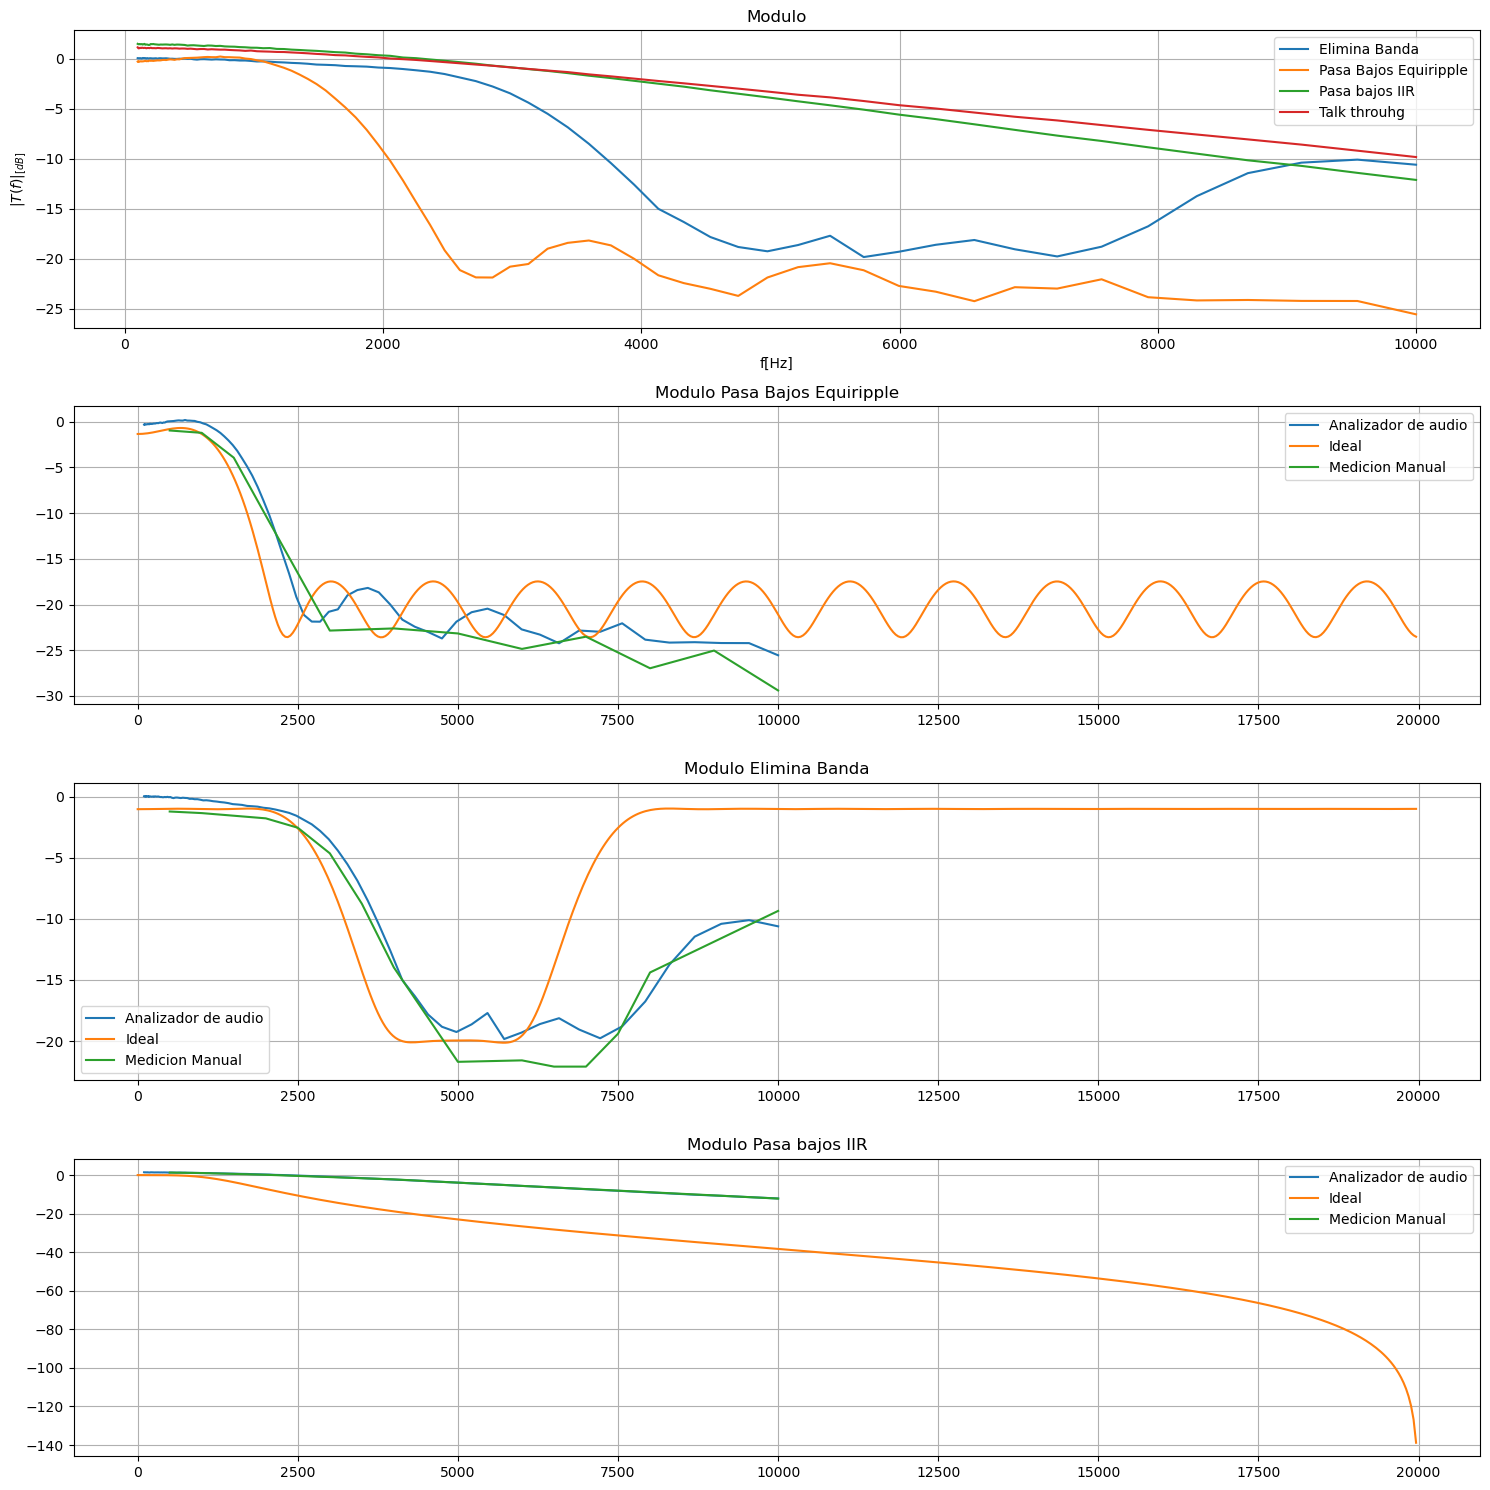

In [13]:
#levantamos los valores de modulo (previeamente descartamos el header y otro relleno del csv.)
# TODO obtener los valores con el analizado de audio y plotearlos junto a los valores obtenidos manualmente.
raw_data_0 = np.genfromtxt('Sweep Data_0.csv', delimiter = ',') 
raw_data_1 = np.genfromtxt('Sweep Data_1.csv', delimiter = ',')
raw_data_2 = np.genfromtxt('Sweep Data_2.csv', delimiter = ',')
raw_data_3 = np.genfromtxt('Sweep Data_3.csv', delimiter = ',')

freq_0 = raw_data_0[:,0]
mod_0 = raw_data_0[:,1]
freq_1 = raw_data_1[:,0]
mod_1 = raw_data_1[:,1]
freq_2 = raw_data_2[:,0]
mod_2 = raw_data_2[:,1]
freq_3 = raw_data_3[:,0]
mod_3 = raw_data_3[:,1]

#configuramos la cantidad de graficos, 3 filas 1 columna
figure, axes = plt.subplots(4,1, figsize=(15, 15))
axes[0].plot(freq_0, mod_0)
axes[0].plot(freq_1, mod_1)
axes[0].plot(freq_2, mod_2)
axes[0].plot(freq_3, mod_3)
axes[0].set_ylabel(r'$|T(f)|_{[dB]}$')
axes[0].set_xlabel('f[Hz]')
axes[0].grid()
axes[0].set_title("Modulo")
axes[0].legend(["Elimina Banda","Pasa Bajos Equiripple", "Pasa bajos IIR", "Talk throuhg"])
axes[1].plot(freq_1, mod_1, wz_a*fs/(2*np.pi), 20*np.log10(hz_a), freqs_filter_a, amp_filter_a)
axes[1].legend(["Analizador de audio","Ideal", "Medicion Manual"])
axes[1].grid()
axes[1].set_title("Modulo Pasa Bajos Equiripple")
axes[2].plot(freq_0, mod_0, wz_b*fs/(2*np.pi), 20*np.log10(hz_b), freqs_filter_b, amp_filter_b)
axes[2].legend(["Analizador de audio","Ideal", "Medicion Manual"])
axes[2].grid()
axes[2].set_title("Modulo Elimina Banda")
axes[3].plot(freq_2, mod_2, wz_c*fs/(2*np.pi), 20*np.log10(hz_c), freqs_filter_c, amp_filter_c)
axes[3].legend(["Analizador de audio","Ideal", "Medicion Manual"])
axes[3].grid()
axes[3].set_title("Modulo Pasa bajos IIR")
figure.tight_layout()

## Conclucion

#### Curva de modulos de los filtros:

Con respercto al filtro Pasa Bajos Equiripple se puedo observar una ateniacion de unos 20db serva de los 2,4KhHz
cumple la funcion de pasabajo.

Como podemos ver lo mismo pasa con el elimina banda una atenuacion de 20db entre los 4,5KHz a 7KHz aproximadamente
es el eliminabanda deseado un poco corrido.

Con respecto al filtro IIR diseñado ya que el mismo tenia un comportamiento inestable al realizar el barrido en frecuencia, por ello se realizaron las mediciones con un filtro de orden 1. Como consecuencia de esto el filtro IIR es el que presenta mayor divergencia entre lo simulado y lo obtenido en el laboratorio.


####  Fase:

con respecto a la face como no se puedieron tomar valores correctos como se puede visualizar en los graficos de mediciones
Luego al medir con el analizador la cantidad de muestras es superior y se podria graficar la fase, pero debido a la implementacion por buffers propia de la CMSIS la fase que se obtiene no es la esperada.

#### Retardo de grupo:

Al no tener mediciones de fase correcta no podemos calcular el retardo de grupo de forma correcta.